In [1]:
import omicverse as ov
import drug2cell as d2c
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/
Dependency error: (pydeseq2 0.4.1 (/opt/miniforge/envs/omicverse/lib/python3.10/site-packages), Requirement.parse('pydeseq2<=0.4.0,>=0.3'))


In [2]:
import scanpy as sc

In [3]:
adata=ov.read('/data/hulei/PengLiu/zahuo/zyh/rb_ganguang_all+(1).h5ad')
adata

AnnData object with n_obs × n_vars = 20843 × 20336
    obs: 'tissue', 'domain', 'sample', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'celltype'
    var: 'feature_types', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'celltype_colors', 'cosg', 'dendrogram_leiden', 'hvg', 'layers_counts', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'rank_genes_groups', 'sample_colors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'X_mde_pca', 'X_mde_scVI', 'X_scVI', 'X_umap', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'counts', 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

In [4]:
adata.X.max()

11.973404

In [3]:
d2c.score?

Signature:
d2c.score(
    adata,
    targets=None,
    nested=False,
    categories=None,
    method='mean',
    layer=None,
    use_raw=False,
    n_bins=25,
    ctrl_size=50,
    sep=',',
)
Docstring:
Obtain per-cell scoring of gene groups of interest. Distributed with a set of 
ChEMBL drug targets that can be used immediately.

Please ensure that the gene nomenclature in your target sets is compatible with your 
``.var_names`` (or ``.raw.var_names``). The ChEMBL drug targets use HGNC (human gene 
names in line with standard cell ranger mapping output).

Adds ``.uns['drug2cell']`` to the input AnnData, a new AnnData object with the same 
observation space but with the scored gene groups as the features. The gene group 
members used to compute the scores will be listed in ``.var['genes']`` of the new 
object.

Input
-----
adata : ``AnnData``
    Using log-normalised data is recommended.
targets : ``dict`` of lists of ``str``, optional (default: ``None``)
    The gene groups to evaluat

In [5]:
d2c.score(adata, use_raw=False)

In [6]:
adata.uns['drug2cell'].var

,genes,all_genes
CHEMBL1615779|IOBENGUANE I 131,SLC6A2,SLC6A2
CHEMBL3989924|LUTETIUM DOTATATE LU-177,"SSTR5,SSTR2","SSTR1,SSTR5,SSTR4,SSTR3,SSTR2"
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM,"COL24A1,COL11A1,COL3A1,COL5A2,COL4A4,COL4A3,CO...","COL1A2,COL1A1,COL18A1,COL5A3,COL11A2,COL27A1,C..."
CHEMBL4297240|ONASEMNOGENE ABEPARVOVEC,"SMN2,SMN1","SMN2,SMN1"
CHEMBL256997|ATALUREN,"RPL22,RPL11,RPS8,RPL5,RPS27,RPS7,RPS27A,RPL31,...","RPL37,RPS21,RPSA,RPS7,RPLP0,RPL23A,RPL21,RPS3,..."
...,...,...
CHEMBL1201142|RASAGILINE MESYLATE,MAOB,MAOB
CHEMBL1484251|CHLORHEXIDINE HYDROCHLORIDE,"USP1,MEN1,KMT2A,TDP1,MAPK1","KMT2A,TDP1,USP1,MAPK1,MEN1"
CHEMBL93|ZILEUTON,"LMNA,ALOX5,LTA4H","LTA4H,ALOX5,LMNA"
CHEMBL1200463|OXAPROZIN POTASSIUM,"PTGS2,PTGS1","PTGS2,PTGS1"


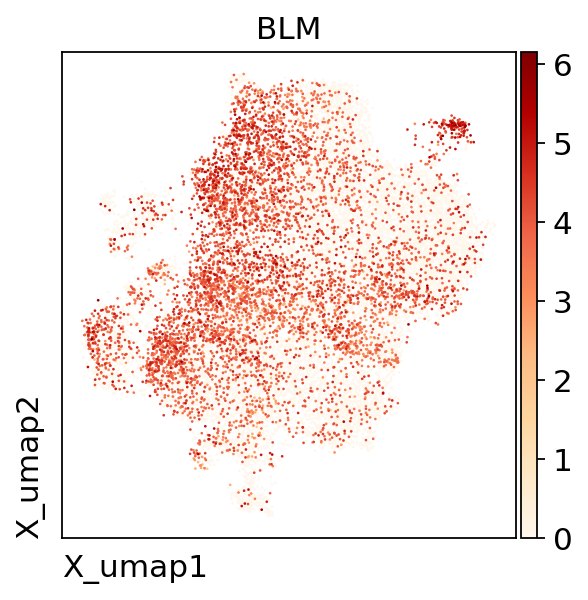

In [153]:
ov.pl.embedding(adata, 
                basis='X_umap',
           color="BLM", color_map="OrRd")


In [8]:
adata_drug=adata.uns['drug2cell']
adata_drug

AnnData object with n_obs × n_vars = 20843 × 2227
    obs: 'tissue', 'domain', 'sample', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'celltype'
    var: 'genes', 'all_genes'
    obsm: 'X_mde_pca', 'X_mde_scVI', 'X_scVI', 'X_umap', 'scaled|original|X_pca'

In [9]:
adata_drug.var['drug_names']=[i.split('|')[1] for i in adata_drug.var.index]
adata_drug.var['CHEMBL']=[i.split('|')[0] for i in adata_drug.var.index]
adata_drug.var.head()

,genes,all_genes,drug_names,CHEMBL
CHEMBL1615779|IOBENGUANE I 131,SLC6A2,SLC6A2,IOBENGUANE I 131,CHEMBL1615779
CHEMBL3989924|LUTETIUM DOTATATE LU-177,"SSTR5,SSTR2","SSTR1,SSTR5,SSTR4,SSTR3,SSTR2",LUTETIUM DOTATATE LU-177,CHEMBL3989924
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM,"COL24A1,COL11A1,COL3A1,COL5A2,COL4A4,COL4A3,CO...","COL1A2,COL1A1,COL18A1,COL5A3,COL11A2,COL27A1,C...",COLLAGENASE CLOSTRIDIUM HISTOLYTICUM,CHEMBL2108709
CHEMBL4297240|ONASEMNOGENE ABEPARVOVEC,"SMN2,SMN1","SMN2,SMN1",ONASEMNOGENE ABEPARVOVEC,CHEMBL4297240
CHEMBL256997|ATALUREN,"RPL22,RPL11,RPS8,RPL5,RPS27,RPS7,RPS27A,RPL31,...","RPL37,RPS21,RPSA,RPS7,RPLP0,RPL23A,RPL21,RPS3,...",ATALUREN,CHEMBL256997


In [10]:
adata_drug.var.index=adata_drug.var['drug_names'].tolist()

In [11]:
adata_drug.var.index=[i.replace(' ','\n') for i in adata_drug.var.index]

In [12]:
adata_drug.var_names_make_unique()

Storing dendrogram info using `.uns['dendrogram_celltype']`
ranking genes
    finished: added to `.uns['celltype_ttest']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


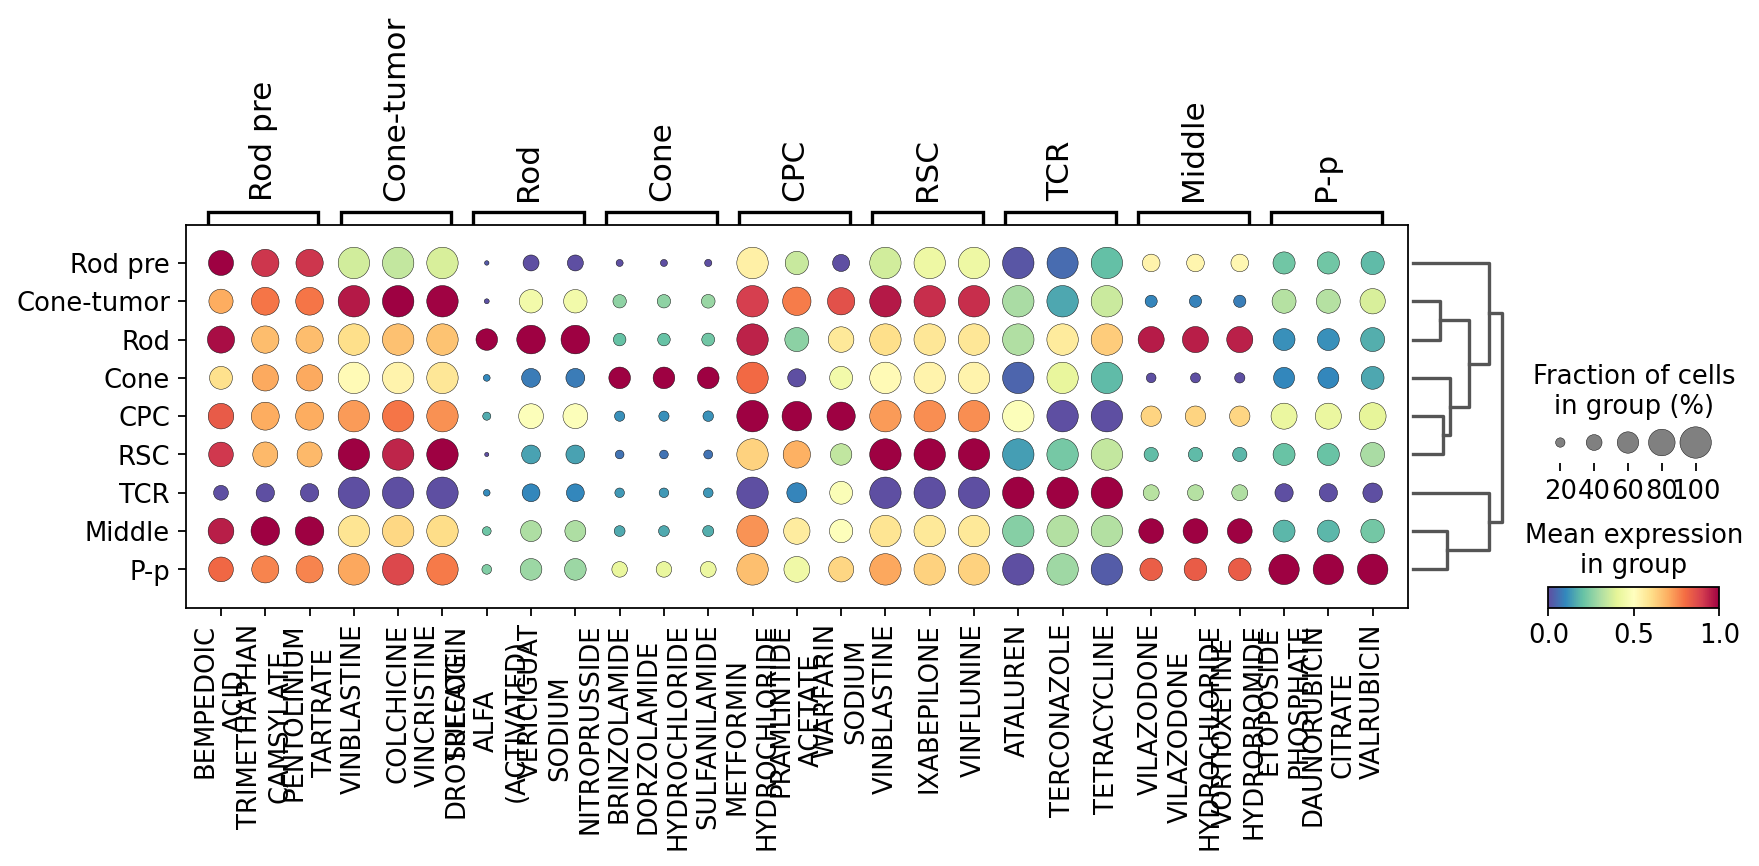

In [13]:
import scanpy as sc
sc.tl.dendrogram(adata_drug,'celltype',use_rep='X_scVI')
sc.tl.rank_genes_groups(adata_drug, 'celltype', use_rep='X_scVI',
                        method='t-test',use_raw=False,key_added='celltype_ttest')
sc.pl.rank_genes_groups_dotplot(adata_drug,groupby='celltype',
                                cmap='Spectral_r',key='celltype_ttest',
                                standard_scale='var',n_genes=3,)

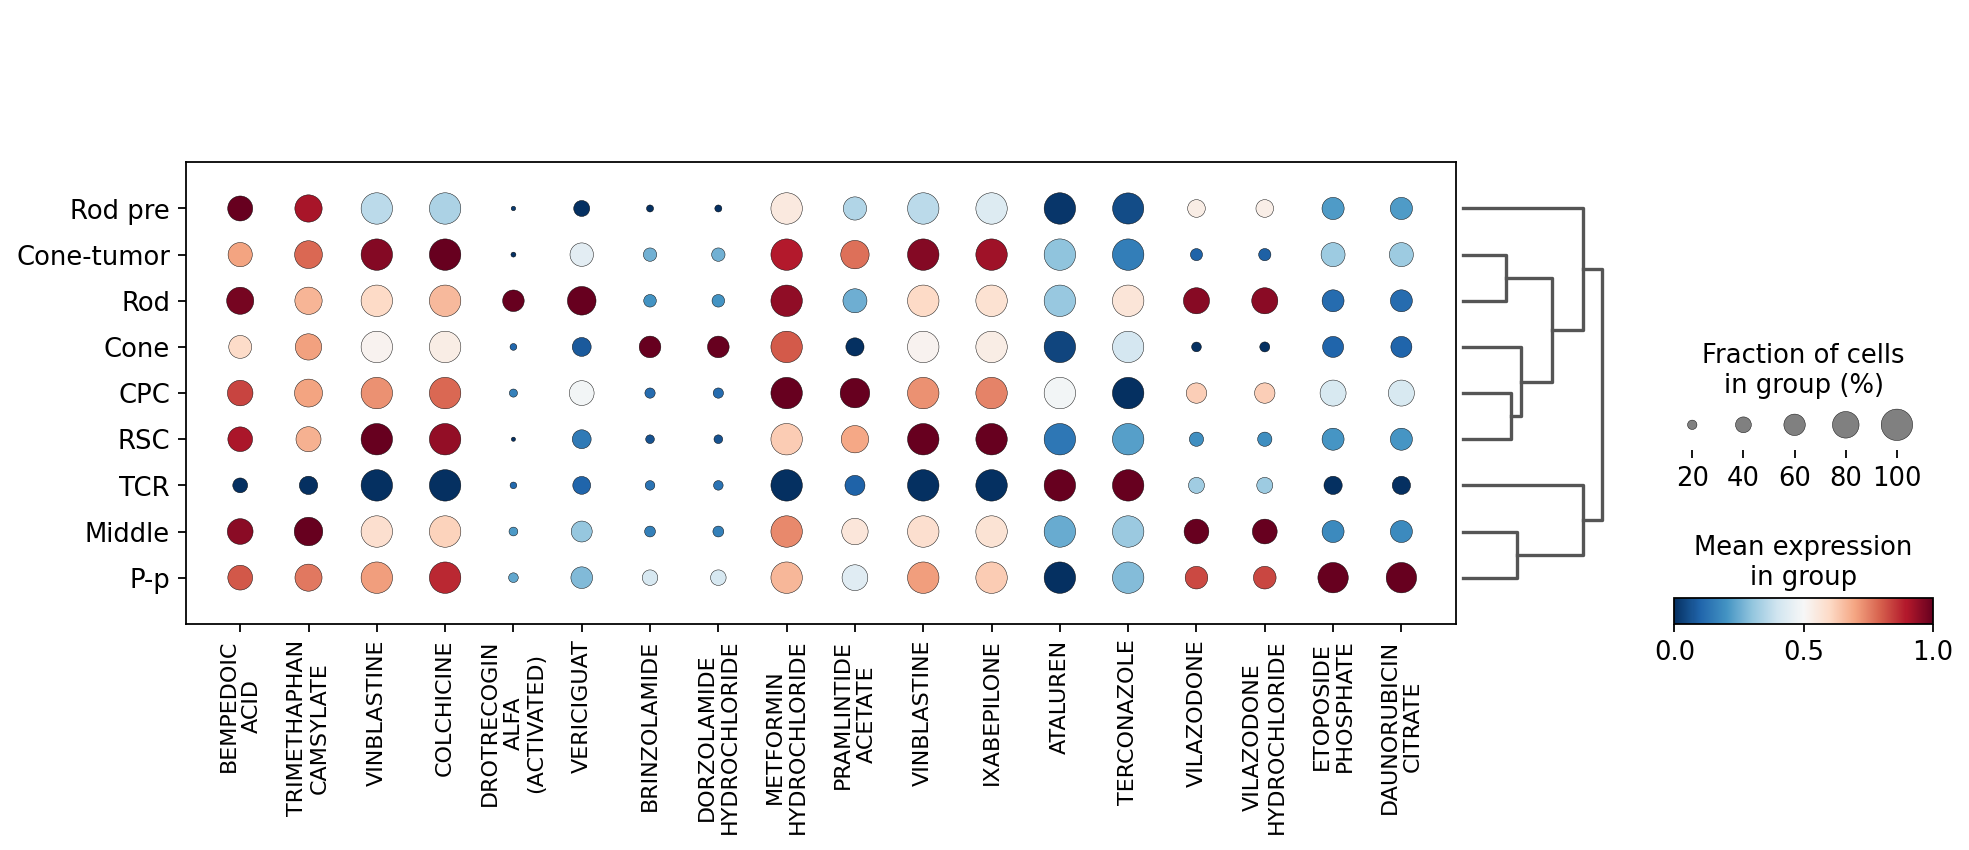

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,5))
axes_dict=sc.pl.rank_genes_groups_dotplot(adata_drug,groupby='celltype',
                                cmap='RdBu_r',key='celltype_ttest',
                                standard_scale='var',n_genes=2,
                               ax=ax,show=False)
axes_dict['gene_group_ax'].set_visible(False)
for label in axes_dict['mainplot_ax'].get_xticklabels():
    #label.set
    #label_text = label.get_text()
    label.set_size(10)
    #if label_text in gene_colors:
    # label.set_color(gene_colors[label_text])
#plt.savefig(f'figures/drug/gc_drug_dot.png',dpi=300,bbox_inches='tight')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
**finished identifying marker genes by COSG**


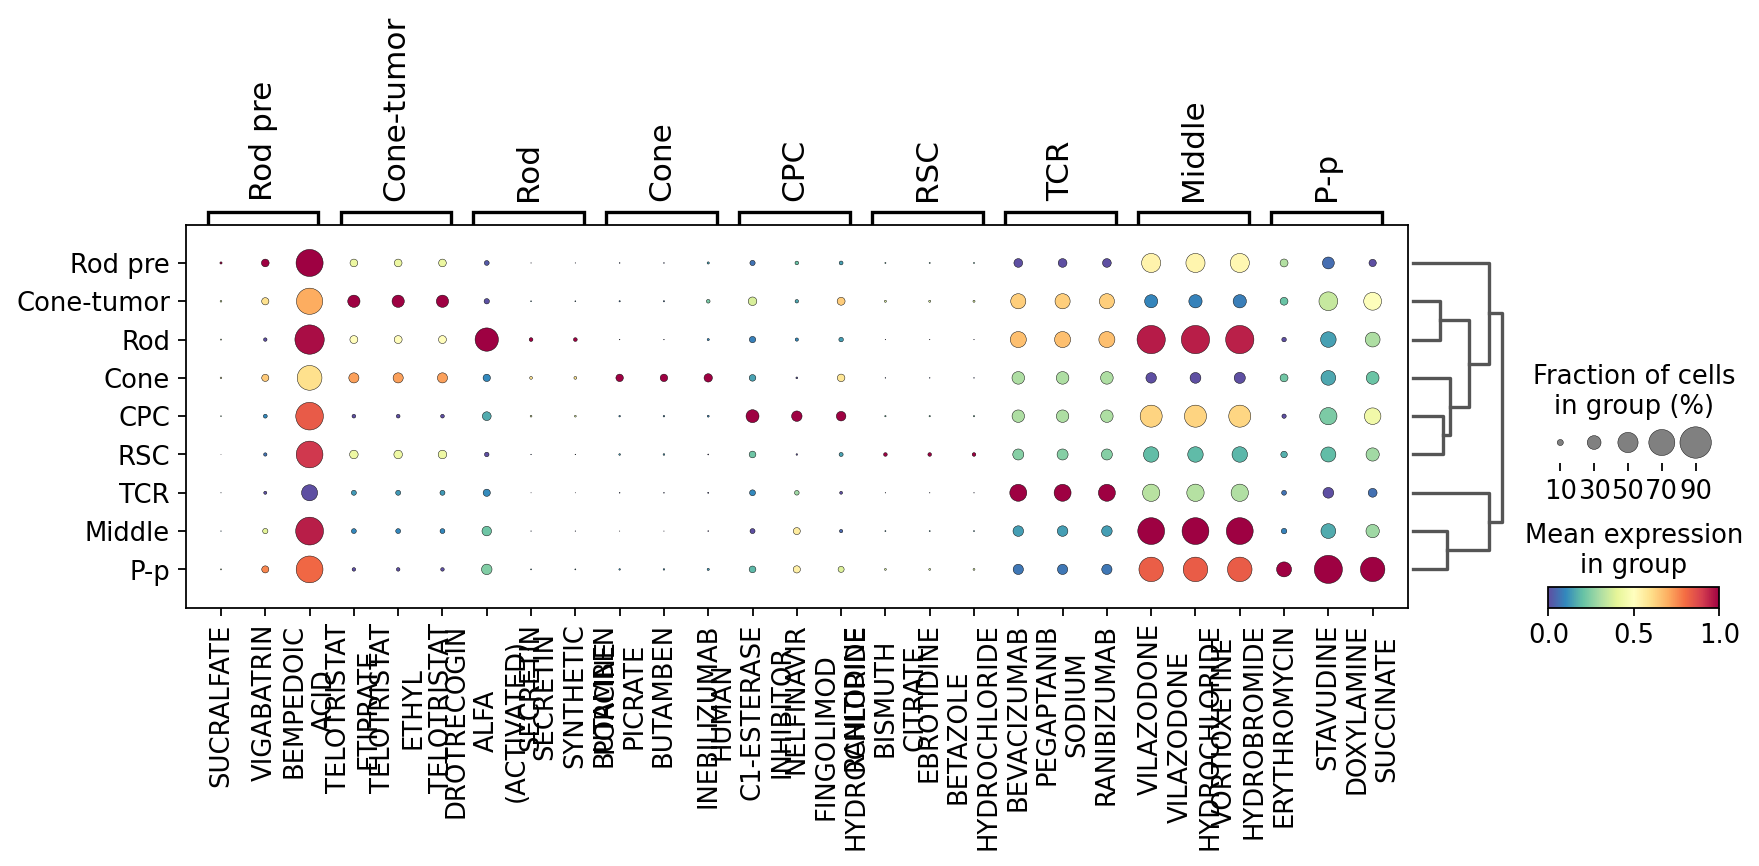

In [15]:
sc.tl.rank_genes_groups(adata_drug, groupby='celltype', 
                        method='t-test',use_rep='X_scVI',)
ov.single.cosg(adata_drug, key_added='celltype_cosg', groupby='celltype')
sc.pl.rank_genes_groups_dotplot(adata_drug,groupby='celltype',
                                cmap='Spectral_r',key='celltype_cosg',
                                standard_scale='var',n_genes=3)

In [16]:
adata_drug.layers['normalized']=adata_drug.X.copy()

In [98]:
adata_drug.obs['type'] =''
adata_drug.obs.loc[adata_drug.obs['celltype'] != 'Cone-tumor', 'type'] = 'Normal'
adata_drug.obs.loc[adata_drug.obs['celltype'] == 'Cone-tumor', 'type'] = 'Tumor'

In [99]:
adata_drug.obs

,tissue,domain,sample,nUMIs,mito_perc,detected_genes,cell_complexity,doublet_score,predicted_doublet,passing_mt,passing_nUMIs,passing_ngenes,n_genes,leiden,celltype,type
cell_0,rb,scRNA-seq,GSM5015165_4month_scRNA,7331.0,0.030692,2851,0.388896,0.045011,False,True,True,True,2851,0,TCR,Normal
cell_1,rb,scRNA-seq,GSM5015165_4month_scRNA,42720.0,0.049649,7893,0.184761,0.030612,False,True,True,True,7893,8,Cone,Normal
cell_2,rb,scRNA-seq,GSM5015165_4month_scRNA,9490.0,0.047102,3496,0.368388,0.029360,False,True,True,True,3496,8,Cone,Normal
cell_3,rb,scRNA-seq,GSM5015165_4month_scRNA,7830.0,0.015964,2583,0.329885,0.074643,False,True,True,True,2583,0,TCR,Normal
cell_4,rb,scRNA-seq,GSM5015165_4month_scRNA,35246.0,0.049140,7027,0.199370,0.114972,False,True,True,True,7026,8,Cone,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_20838,rb,scRNA-seq,GSM7968800_Extraocular_scRNA,11517.0,0.041330,3126,0.271425,0.025641,False,True,True,True,3126,7,RSC,Normal
cell_20839,rb,scRNA-seq,GSM7968800_Extraocular_scRNA,4423.0,0.035722,2021,0.456930,0.021916,False,True,True,True,2021,2,Middle,Normal
cell_20840,rb,scRNA-seq,GSM7968800_Extraocular_scRNA,4499.0,0.002667,1647,0.366081,0.028161,False,True,True,True,1647,0,TCR,Normal
cell_20841,rb,scRNA-seq,GSM7968800_Extraocular_scRNA,9318.0,0.021678,3360,0.360592,0.031259,False,True,True,True,3360,6,Cone-tumor,Tumor


In [147]:
adata.to_df

<bound method AnnData.to_df of AnnData object with n_obs × n_vars = 20843 × 20336
    obs: 'tissue', 'domain', 'sample', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'celltype'
    var: 'feature_types', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'celltype_colors', 'cosg', 'dendrogram_leiden', 'hvg', 'layers_counts', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'rank_genes_groups', 'sample_colors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap', 'drug2cell'
    obsm: 'X_mde_pca', 'X_mde_scVI', 'X_scVI', 'X_umap', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'counts', 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'>

In [ ]:
adata

In [110]:
def deg_clusters(adata,group_type,
                treatmentgroup,controlgroup,layer='normalized'):
    from tqdm import tqdm
    deg_results_dict={}
   
    
    dds=ov.bulk.pyDEG(adata.to_df(layer=layer).T)
    treatment_groups=adata.obs[adata.obs[group_type]==treatmentgroup].index.tolist()
    
    control_groups=adata.obs[adata.obs[group_type]==controlgroup].index.tolist()
        
    dds.result=dds.deg_analysis(treatment_groups,control_groups,method='ttest')
    dds.result=dds.result.loc[dds.result['BaseMean']>0.5]
        # -1 means automatically calculates
    dds.foldchange_set(fc_threshold=0.5,
                           pval_threshold=0.05,
                           logp_max=10)
    deg_results_dict=dds.result
    adata.uns['deg_clusters_dict']=deg_results_dict
    return deg_results_dict
deg_results_dict=deg_clusters(adata=adata_drug,group_type='type',
                treatmentgroup='Tumor',controlgroup='Normal',layer='normalized')

... Fold change threshold: 0.5


In [111]:
deg_results_dict

,pvalue,qvalue,FoldChange,MaxBaseMean,BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,-log(pvalue),-log(qvalue),sig
LUTETIUM\nDOTATATE\nLU-177,1.628252e-30,5.187579e-30,1.222467,1.556404,1.414778,0.500575,0.289796,0.289796,0.122247,29.788278,10.000000,normal
ATALUREN,2.732568e-05,4.182426e-05,0.995209,7.038042,7.021182,2.811714,-0.006928,0.006928,0.099521,4.563429,4.378572,normal
ETHAMIVAN,2.892609e-42,1.204082e-41,1.471878,1.587427,1.332953,0.414626,0.557658,0.557658,0.147188,41.538710,10.000000,up
NITRIC\nOXIDE,4.977901e-35,1.790919e-34,1.268721,1.269618,1.135154,0.182888,0.343375,0.343375,0.126872,34.302954,10.000000,normal
FOLIC\nACID,5.978211e-24,1.676760e-23,1.217132,2.394540,2.180944,1.124952,0.283486,0.283486,0.121713,23.223429,10.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
CEFMETAZOLE\nSODIUM,5.791322e-26,1.672798e-25,1.193775,1.585108,1.456453,0.542459,0.255531,0.255531,0.119378,25.237222,10.000000,normal
CYCLOPHOSPHAMIDE-1,2.481102e-70,2.246104e-69,1.120132,4.508143,4.266394,2.093017,0.163669,0.163669,0.112013,69.605355,10.000000,normal
CHLORHEXIDINE\nHYDROCHLORIDE,3.756081e-20,9.806321e-20,1.086409,2.265341,2.175249,1.121180,0.119568,0.119568,0.108641,19.425265,10.000000,normal
ZILEUTON,4.406838e-07,7.091060e-07,1.121557,0.845006,0.799210,-0.323354,0.165504,0.165504,0.112156,6.355873,6.149289,normal


In [102]:
marker_dict=ov.single.get_celltype_marker(adata_drug,clustertype='celltype',rank=False,
                                  key='celltype_ttest',method='t-test',
                                  scores_type='logfoldchanges',foldchange=1,
                                  topgenenumber=20)

...get cell type marker
ranking genes


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [103]:
marker_dict

{'CPC': ['NELFINAVIR'],
 'Cone': ['BRINZOLAMIDE',
  'DORZOLAMIDE\nHYDROCHLORIDE',
  'SULFANILAMIDE',
  'ACETAZOLAMIDE\nSODIUM',
  'VALDECOXIB',
  'DINOPROST',
  'BIMATOPROST',
  'LATANOPROST',
  'CARBOPROST\nTROMETHAMINE',
  'TAFLUPROST',
  'TRAVOPROST',
  'LATANOPROSTENE\nBUNOD',
  'MELOXICAM',
  'PARECOXIB',
  'ETORICOXIB',
  'LUMIRACOXIB',
  'PARECOXIB\nSODIUM',
  'CARPROFEN',
  'ROFECOXIB',
  'BROMFENAC\nSODIUM'],
 'Cone-tumor': ['SARGRAMOSTIM',
  'DAPIPRAZOLE\nHYDROCHLORIDE',
  'BENDAZAC',
  'FEBUXOSTAT',
  'OXYPURINOL',
  'ALLOPURINOL\nSODIUM'],
 'Middle': ['VILAZODONE'],
 'P-p': ['ETOPOSIDE\nPHOSPHATE',
  'DAUNORUBICIN\nCITRATE',
  'VALRUBICIN',
  'TENIPOSIDE',
  'DEXRAZOXANE',
  'TAZEMETOSTAT\nHYDROBROMIDE',
  'METHOTREXATE\nSODIUM',
  'STAVUDINE',
  'GANCICLOVIR',
  'MILRINONE',
  'ETHAMIVAN',
  'MELATONIN',
  'HOMATROPINE\nHYDROBROMIDE',
  'ACETYLCYSTEINE',
  'TAURINE',
  'LEVAMISOLE\nHYDROCHLORIDE',
  'TRIHEXYPHENIDYL\nHYDROCHLORIDE',
  'GLUTAMINE',
  'DOXYLAMINE\nSUCCINATE'

In [112]:
from tqdm import tqdm
for cluster in tqdm(adata_drug.obs['celltype'].cat.categories):
    deg_cluster=cluster
    res=list(set(marker_dict[deg_cluster]) & set(deg_results_dict.loc[deg_results_dict['sig']!='normal'].index))
    print(deg_cluster,res)

100%|█████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2760.02it/s]

CPC []
Cone []
Cone-tumor []
Middle ['VILAZODONE']
P-p ['ACETYLCYSTEINE', 'GLUTAMINE', 'TAURINE', 'LEVAMISOLE\nHYDROCHLORIDE', 'TRIHEXYPHENIDYL\nHYDROCHLORIDE', 'DOXYLAMINE\nSUCCINATE', 'MELATONIN', 'HOMATROPINE\nHYDROBROMIDE', 'ETHAMIVAN']
RSC []
Rod ['VILAZODONE']
Rod pre []
TCR []


In [113]:
deg_cluster='P-p'
res=list(set(marker_dict[deg_cluster]) & set(deg_results_dict.loc[deg_results_dict['sig']!='normal'].index))


In [114]:
res

['ACETYLCYSTEINE',
 'GLUTAMINE',
 'TAURINE',
 'LEVAMISOLE\nHYDROCHLORIDE',
 'TRIHEXYPHENIDYL\nHYDROCHLORIDE',
 'DOXYLAMINE\nSUCCINATE',
 'MELATONIN',
 'HOMATROPINE\nHYDROBROMIDE',
 'ETHAMIVAN']

In [115]:
ov.utils.plot_text_set(','.join(res))

'ACETYLCYSTEINE,GLUTAMINE,TAURINE,LEVAMISOLE\nHYDROCHLORIDE,TRIHEXYPHENIDYL\nHYDROCHLORIDE,DOXYLAMINE\nSUCCINATE,MELATONIN,HOMATROPINE\nHYDROBROMIDE,ETHAMIVAN'

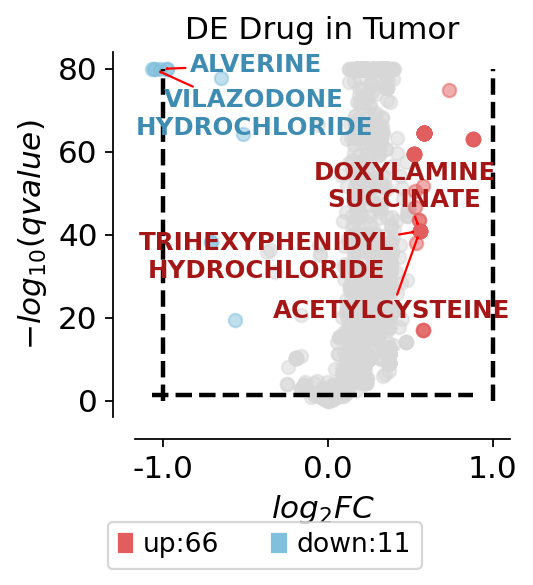

In [155]:
deg_cluster='P-p'
ov.pl.volcano(deg_results_dict,pval_name='qvalue',fc_name='log2FC',
                     pval_threshold=0.05,fc_max=1,fc_min=-1,
                      pval_max=80,FC_max=3,
                    figsize=(3,3),title=f'DE Drug in Tumor',titlefont={'weight':'normal','size':14,},
                     up_color='#e25d5d',down_color=ov.pl.blue_color[2],normal_color='#d7d7d7',
                     up_fontcolor='#a51616',down_fontcolor=ov.pl.blue_color[3],normal_fontcolor='#d7d7d7',
                     legend_bbox=(0.8, -0.25),legend_ncol=2,legend_fontsize=12,
                     plot_genes=['ACETYLCYSTEINE', 'TRIHEXYPHENIDYL\nHYDROCHLORIDE', 
                                 'DOXYLAMINE\nSUCCINATE', 
                                 'ALVERINE', 
                                 'VILAZODONE\nHYDROCHLORIDE',],
                               #  'TIOPRONIN', 'NICORANDIL', 'NOSCAPINE'],
                    #plot_genes_num=5,
                    plot_genes_fontsize=11,
                     ticks_fontsize=12,)
plt.savefig('/data/hulei/PengLiu/zahuo/zyh/DE Drug in Tumor',dpi=300,bbox_inches='tight')

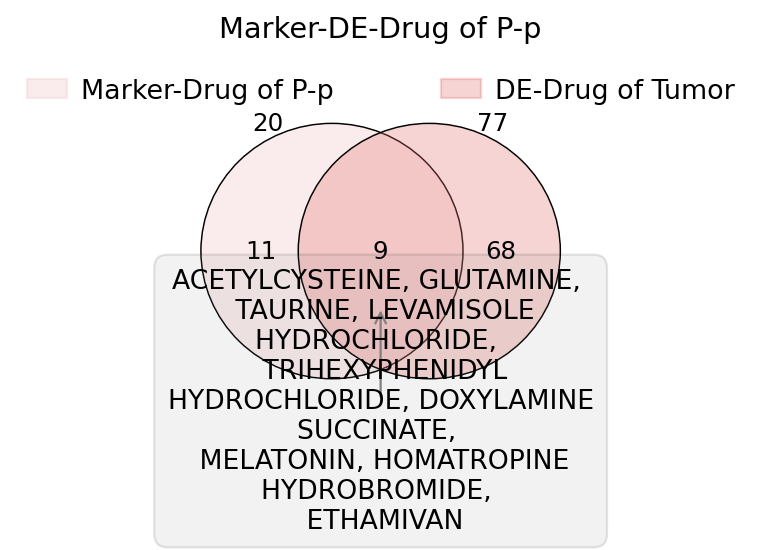

In [154]:
fig,ax=plt.subplots(figsize = (3,3))
#dict of sets
sets = {
    'Marker-Drug of P-p': set(marker_dict[deg_cluster]),
    'DE-Drug of Tumor': set(deg_results_dict.loc[deg_results_dict['sig']!='normal'].index),
}
    
ov.pl.venn(sets=sets,ax=ax,fontsize=5.5,
           palette=ov.pl.red_color)

plt.title('Marker-DE-Drug of P-p',fontsize=13)

plt.annotate(ov.utils.plot_text_set(', '.join(res)), xy=(50,30), xytext=(0,-100),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),size=12)

plt.savefig('/data/hulei/PengLiu/zahuo/zyh/Marker-DE-Drug of P-p',dpi=300,bbox_inches='tight')

In [51]:
deg_results_dict[deg_cluster].loc['ESCITALOPRAM']

pvalue                  0.0
qvalue                  0.0
FoldChange         4.507284
MaxBaseMean        1.268529
BaseMean           0.774878
log2(BaseMean)    -0.367959
log2FC             2.172258
abs(log2FC)        2.172258
size               0.450728
-log(pvalue)      55.077803
-log(qvalue)           10.0
sig                      up
Name: ESCITALOPRAM, dtype: object

In [52]:
deg_results_dict[deg_cluster].loc['NOSCAPINE']

pvalue                  0.0
qvalue                  0.0
FoldChange         4.507284
MaxBaseMean        1.268529
BaseMean           0.774878
log2(BaseMean)    -0.367959
log2FC             2.172258
abs(log2FC)        2.172258
size               0.450728
-log(pvalue)      55.077803
-log(qvalue)           10.0
sig                      up
Name: NOSCAPINE, dtype: object

In [131]:
adata_drug

AnnData object with n_obs × n_vars = 20843 × 2227
    obs: 'tissue', 'domain', 'sample', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'celltype', 'type'
    var: 'genes', 'all_genes', 'drug_names', 'CHEMBL'
    uns: 'dendrogram_celltype', 'celltype_ttest', 'rank_genes_groups', 'celltype_cosg', 'deg_clusters_dict', 'type_colors'
    obsm: 'X_mde_pca', 'X_mde_scVI', 'X_scVI', 'X_umap', 'scaled|original|X_pca'
    layers: 'normalized'

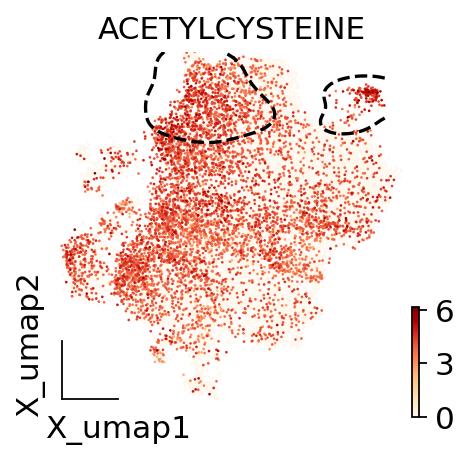

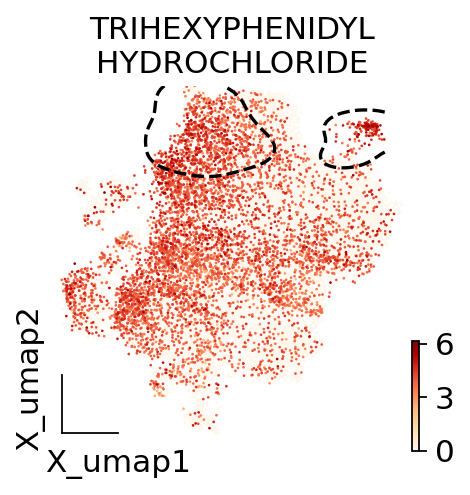

In [134]:
for drug in ['ACETYLCYSTEINE', 'TRIHEXYPHENIDYL\nHYDROCHLORIDE']:
    fig,ax=plt.subplots(figsize = (3,3))
    ov.pl.embedding(adata_drug, 
                    basis='X_umap',
               color=drug, color_map="OrRd",
                   frameon='small',show=False,ax=ax)
    ov.pl.contour(ax=ax,adata=adata_drug,groupby='celltype',clusters=[deg_cluster],
       basis='X_umap',contour_threshold=0.1,colors='#000000',
        linestyles='dashed',)
    #plt.savefig(f'figures/drug/emb_drug_{drug}-33.png',dpi=300,bbox_inches='tight')

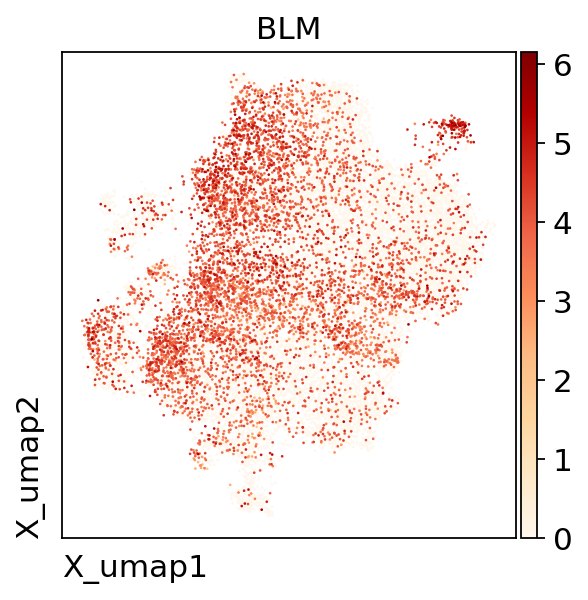

In [140]:
ov.pl.embedding(adata, 
                basis='X_umap',
           color="BLM", color_map="OrRd")


In [139]:
adata

AnnData object with n_obs × n_vars = 20843 × 20336
    obs: 'tissue', 'domain', 'sample', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'celltype'
    var: 'feature_types', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'celltype_colors', 'cosg', 'dendrogram_leiden', 'hvg', 'layers_counts', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'rank_genes_groups', 'sample_colors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap', 'drug2cell'
    obsm: 'X_mde_pca', 'X_mde_scVI', 'X_scVI', 'X_umap', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'counts', 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

In [136]:
adata_drug.var.loc[['ACETYLCYSTEINE', 'TRIHEXYPHENIDYL\nHYDROCHLORIDE','DOXYLAMINE\nSUCCINATE']]

,genes,all_genes,drug_names,CHEMBL
ACETYLCYSTEINE,BLM,"BLM,KDM4E",ACETYLCYSTEINE,CHEMBL600
TRIHEXYPHENIDYL\nHYDROCHLORIDE,BLM,"BLM,CHRM1",TRIHEXYPHENIDYL HYDROCHLORIDE,CHEMBL1092
DOXYLAMINE\nSUCCINATE,"HRH1,BLM","HRH1,BLM",DOXYLAMINE SUCCINATE,CHEMBL1200392


In [57]:
adata.X.max()

15.946658

In [124]:
adata_drug

AnnData object with n_obs × n_vars = 20843 × 2227
    obs: 'tissue', 'domain', 'sample', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'celltype', 'type'
    var: 'genes', 'all_genes', 'drug_names', 'CHEMBL'
    uns: 'dendrogram_celltype', 'celltype_ttest', 'rank_genes_groups', 'celltype_cosg', 'deg_clusters_dict', 'type_colors'
    obsm: 'X_mde_pca', 'X_mde_scVI', 'X_scVI', 'X_umap', 'scaled|original|X_pca'
    layers: 'normalized'

<AxesSubplot: title={'center': 'Group'}, xlabel='X_umap1', ylabel='X_umap2'>

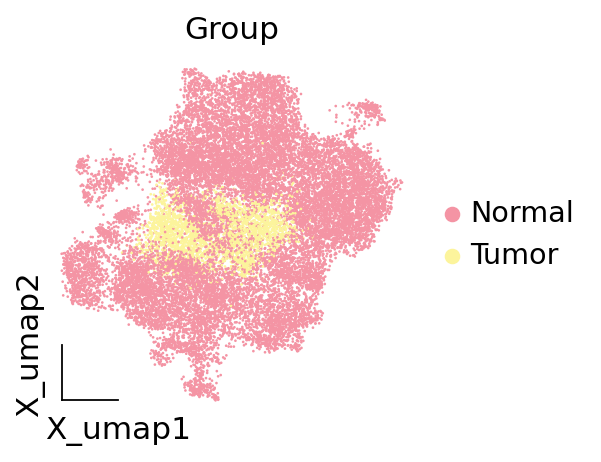

In [126]:
import matplotlib.pyplot as plt
fb=ov.pl.ForbiddenCity()
fig, ax = plt.subplots(figsize=(3,3))
ov.utils.embedding(
    adata_drug,
    basis="X_umap",
    color=['type'],
    title='Group',
    frameon='small',
    #ncols=1,
    palette=[
             fb.get_color(name='杨妃')['color_html'].values[0],
             fb.get_color(name='黄白游')['color_html'].values[0],],
    #legend_loc='on data',
    #legend_fontsize=12,
    ax=ax,
    show=False
    #add_outline=True
    #legend_fontweight='normal'
)

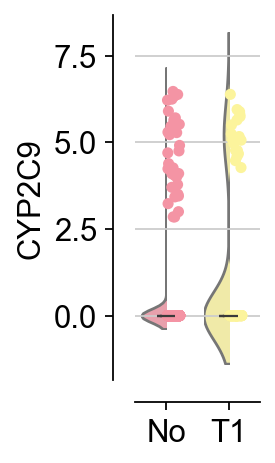

In [126]:
fig, ax = plt.subplots(1,1,figsize=(1,3))
ct='Gastric foveolar cell'
gene='CYP2C9'
violin_box(adata[adata.obs['celltype']==ct],gene,
                 groupby='CancerStage',ax=ax,show=False,
            #fontsize=14
                )
#ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=2.1,
#                  text_y=0.1,
 #               text='$p={}$'.format(round(deg_results_dict_inflow[ct].loc[gene,'qvalue'],4)),
  #                fontsize=11,fontcolor='#000000',
 #                    horizontalalignment='center',)
plt.xlabel('')
plt.savefig(f'figures/drug/violin-signal-{gene}-{ct}-exp.png',dpi=300,bbox_inches='tight')


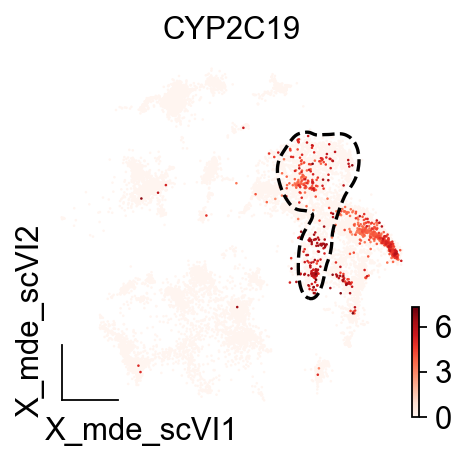

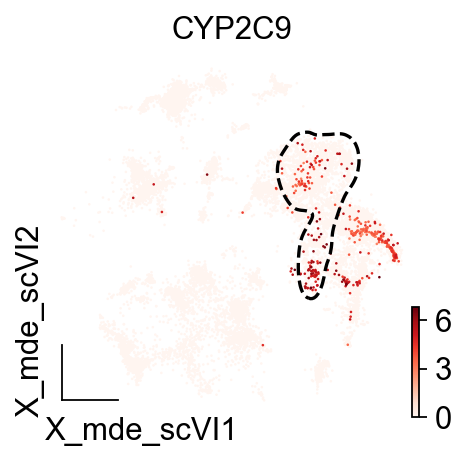

In [124]:
for drug in ['CYP2C19','CYP2C9']:
    fig,ax=plt.subplots(figsize = (3,3))
    ov.pl.embedding(adata, 
                    basis='X_mde_scVI',
               color=drug, color_map="Reds",
                   frameon='small',show=False,ax=ax)
    ov.pl.contour(ax=ax,adata=adata,groupby='best_celltype',clusters=[deg_cluster],
       basis='X_mde_scVI',contour_threshold=0.1,colors='#000000',
        linestyles='dashed',)
    plt.savefig(f'figures/drug/emb_gene_{drug}-33.png',dpi=300,bbox_inches='tight')